**Regresión Simple Lineal**

Aprenderemos cómo utilizar la librería scikit-learn para implementar regresión lineal simple. Descargaremos un set de datos relacionado al consumo de combustible y a la emisión del dióxido de Carbono en autos. Luego, separaremos nuestros datos en un set de entrenamiento y en otro set de prueba, crearemos un modelo utilizando un set de entrenamiento, se evaluará utilizando el set de prueba para finalmente usar el modelo para predecir valores desconocidos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-04-23 17:06:15--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2022-04-23 17:06:16 (1.68 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Hemos descargado el dataset de consumo de combustible, FuelConsumption.csv, el cual contiene ratings específicos al consumo de combustible y emisiones de dióxido de carbono para aquellos vehículos ligeros en la venta minorista dentro de Canadá. Dataset source \

MODELYEAR e.g. 2014 \
MAKE e.g. Acura \
MODEL e.g. ILX \
VEHICLE CLASS e.g. SUV \
ENGINE SIZE e.g. 4.7 \
CYLINDERS e.g 6 \
TRANSMISSION e.g. A6
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9 \
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9 \
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2 \
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0 \

In [3]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [6]:
cdf = df[["ENGINESIZE", "CYLINDERS",	"FUELCONSUMPTION_CITY",	"FUELCONSUMPTION_HWY",	"FUELCONSUMPTION_COMB",	"FUELCONSUMPTION_COMB_MPG",	"CO2EMISSIONS"]]

In [7]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


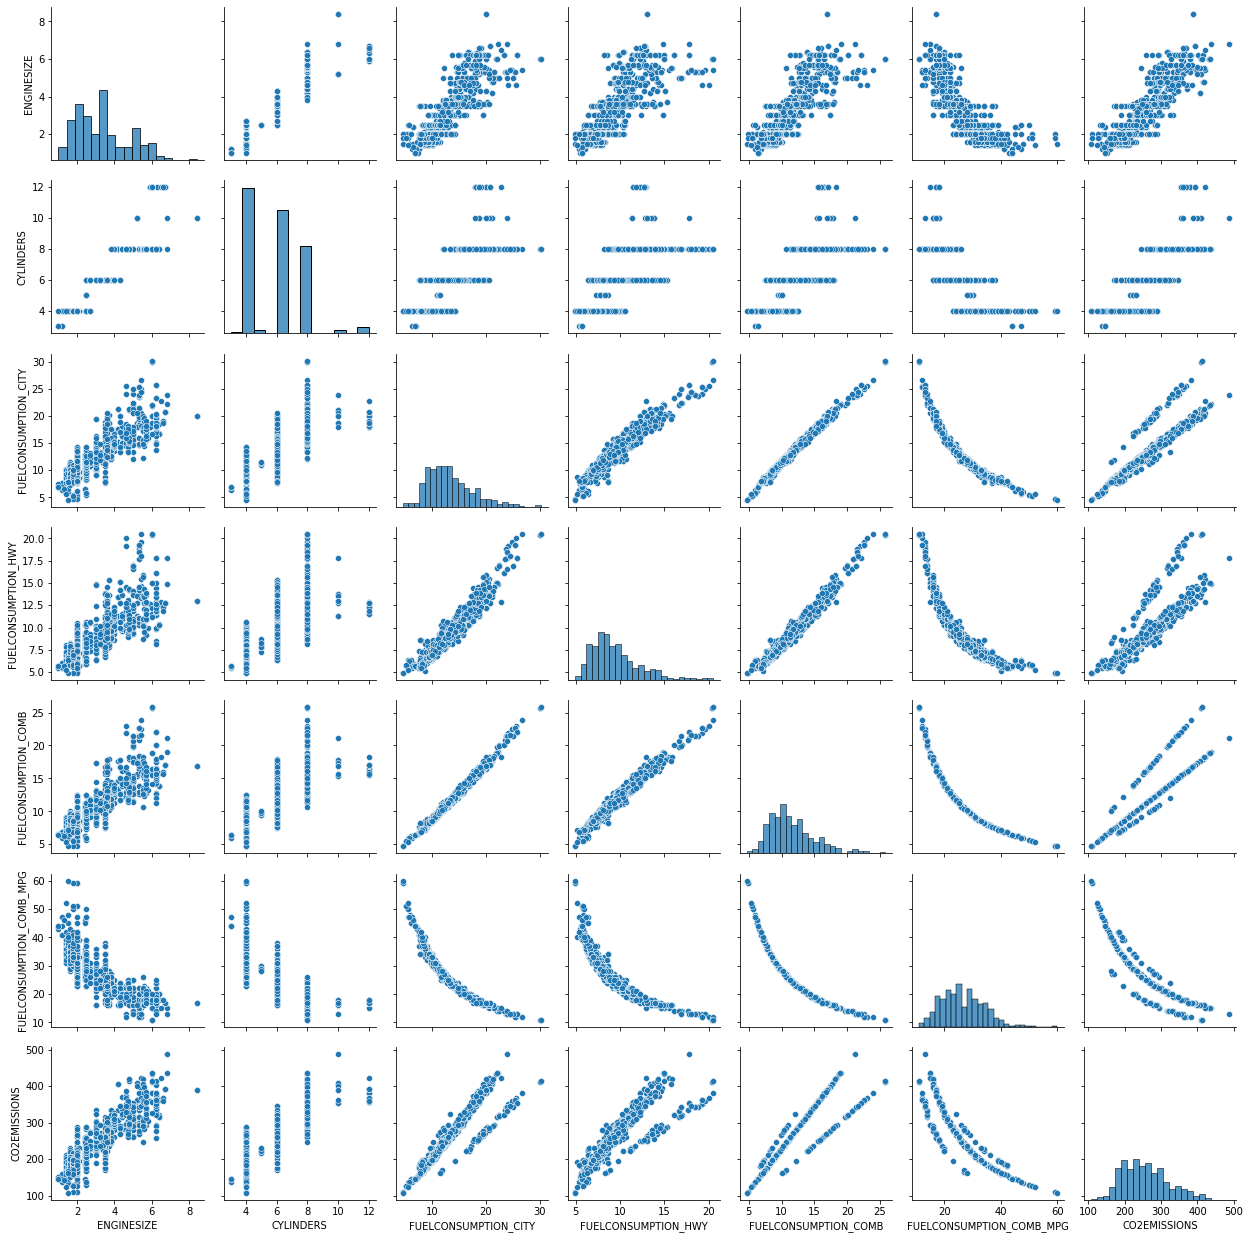

In [8]:
par = sns.pairplot(cdf)

In [18]:
cdf.shape

(1067, 7)

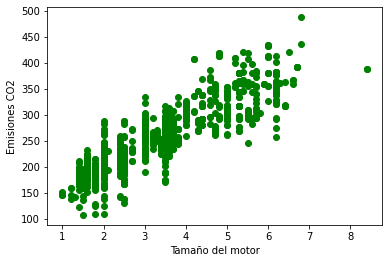

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="green")
plt.xlabel("Tamaño del motor")
plt.ylabel("Emisiones CO2")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [16]:
train.shape

(863, 7)

In [17]:
test.shape

(204, 7)

Modelo de regresión lineal

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Coeficientes de la recta', regr.coef_)
print('Intercept', regr.intercept_)

Coeficientes de la recta [[38.97455501]]
Intercept [125.89157993]


Text(0, 0.5, 'Emisiones')

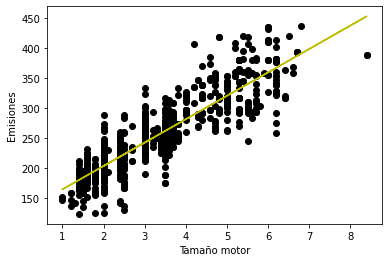

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'black')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'y')
plt.xlabel("Tamaño motor")
plt.ylabel("Emisiones")

Evaluando el modelo de regresión lineal simple

In [36]:
from sklearn.metrics import r2_score

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])
test_y_ =regr.predict(test_x)

In [40]:
#
print("Error medio absoluto: %.2f" %np.mean(np.absolute(test_y_ - test_y)))
#Separación de los puntos en el gráfico, entre mas alto peor 
print("Sema residual de los cuadrados(MSE): %.2f" %np.mean(np.absolute(test_y_ - test_y)**2))
#Este valor debe estar muy cerca de 1 es modelo de predicción es mas efectivo
print("R2 score: %f" % r2_score(test_y_, test_y))

Error medio absoluto: 25.91
Sema residual de los cuadrados(MSE): 1190.80
R2 score: 0.608336
